[*********************100%***********************]  1 of 1 completed
C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0939. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -135.761
Distribution:                  Normal   AIC:                           279.521
Method:            Maximum Likelihood   BIC:                           298.049
                                        No. Observations:                  759
Date:                Sat, Oct 19 2024   Df Residuals:                      758
Time:                        01:51:41   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -4.4287e-03  1.692e-02     -0.262      0.

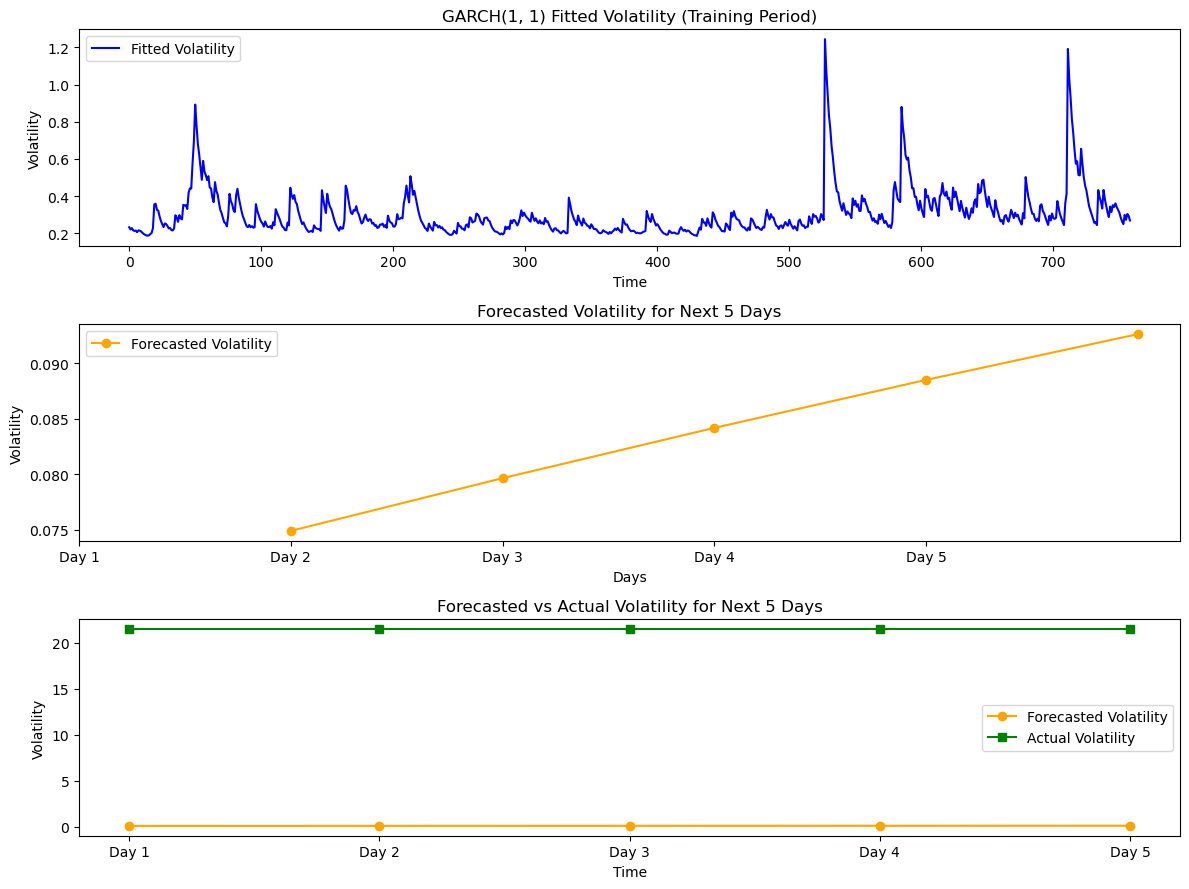

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# Setting the stock ticker symbol and the time period
ticker_symbol = 'META'  
start_date = '2020-01-01'
end_date = '2023-01-15'  # Extended end date to capture 5 additional days for comparison

# Fetch historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate daily returns
data['Returns'] = data['Adj Close'].pct_change()

# Drop any rows with NaN values (if any)
returns = data['Returns'].dropna().values

# Scale the returns
scaled_returns = returns * 10  # Rescale the returns

# Split data into training and testing sets (last 5 days for testing)
train_returns = scaled_returns[:-5]
test_returns = scaled_returns[-5:]

# Fit a GARCH(1, 1) model on the training data
model = arch_model(train_returns, vol='Garch', p=1, q=1)
model_fit = model.fit(disp='off')  # 'disp' controls output during fitting

# Print model summary
print(model_fit.summary())

# Forecast volatility for the next 5 days
forecast_horizon = 5  # Forecasting the next 5 periods
forecast = model_fit.forecast(horizon=forecast_horizon)

# Print forecasted volatilities
print("Forecasted volatilities:")
print(forecast.variance.values[-1, :])  # Print last forecasted variances

# Calculate actual volatility for the test period (simple historical volatility)
test_volatility = np.std(test_returns) / np.mean(test_returns) * np.sqrt(252)  # Annualized volatility
actual_volatilities = [test_volatility] * 5  # For plotting purposes

# Plot the fitted volatility, forecasted volatility, and actual volatility
plt.figure(figsize=(12, 9))

# Plot fitted volatility
plt.subplot(3, 1, 1)
plt.plot(model_fit.conditional_volatility, label='Fitted Volatility', color='blue')
plt.title('GARCH(1, 1) Fitted Volatility (Training Period)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()

# Plot forecasted volatility
plt.subplot(3, 1, 2)

# Forecast horizon is 5, so we only need to plot from Day 1 to Day 5
forecast_days = range(1, forecast_horizon + 1)

# Plot forecasted volatility for the next 5 days
plt.plot(forecast_days, forecast.variance.values[-1, :], label='Forecasted Volatility', color='orange', marker='o')

# Set appropriate title and labels
plt.title('Forecasted Volatility for Next 5 Days')
plt.xlabel('Days')
plt.ylabel('Volatility')
plt.xticks(forecast_days, [f'Day {i}' for i in forecast_days])  # Set x-tick labels as 'Day 1', 'Day 2', etc.
plt.legend()

# Plot forecasted vs actual volatility
plt.subplot(3, 1, 3)
plt.plot(range(forecast_horizon), forecast.variance.values[-1, :], label='Forecasted Volatility', color='orange', marker='o')
plt.plot(range(forecast_horizon), actual_volatilities, label='Actual Volatility', color='green', marker='s')
plt.title('Forecasted vs Actual Volatility for Next 5 Days')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()

# Set custom x-ticks for forecast days
for ax in [plt.subplot(3, 1, 2), plt.subplot(3, 1, 3)]:
    ax.set_xticks(ticks=range(forecast_horizon))
    ax.set_xticklabels([f'Day {i+1}' for i in range(forecast_horizon)])  

plt.tight_layout()
plt.show()


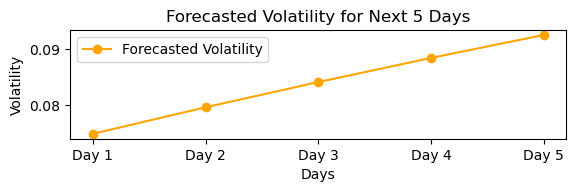

In [5]:
# test run for forecasting graph
# Plot forecasted volatility
plt.subplot(3, 1, 2)

# Forecast horizon is 5, so we only need to plot from Day 1 to Day 5
forecast_days = range(1, forecast_horizon + 1)

# Plot forecasted volatility for the next 5 days
plt.plot(forecast_days, forecast.variance.values[-1, :], label='Forecasted Volatility', color='orange', marker='o')

# Set appropriate title and labels
plt.title('Forecasted Volatility for Next 5 Days')
plt.xlabel('Days')
plt.ylabel('Volatility')
plt.xticks(forecast_days, [f'Day {i}' for i in forecast_days])  # Set x-tick labels as 'Day 1', 'Day 2', etc.
plt.legend()